**SUMMARY**

The wine quality dataset has been used for this assignment.

Tasks done include data preprocessing and dimensionality reduction,Visualisation of correlation, fundamental concepts in machine learning, statistical and machine learning concepts


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.stats import randint, uniform

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Part 1: Descriptive & Inferential Statistics**

**Descriptive Statistics**


**Choose a dataset (wine quality, house prices, etc.)**



In [3]:
#wine quality dataset chosen
wine_data = pd.read_csv("/content/drive/My Drive/winequality-red.csv", sep=";")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
redwine_data = wine_data.rename(
    columns={
        'fixed acidity':'fixed_acidity',
        'volatile acidity':'volatile_acidity',
        'citric acid':'citric_acid',
        'residual sugar':'residual_sugar',
        'free sulfur dioxide':'free_sulfur_dioxide',
        'total sulfur dioxide':'total_sulfur_dioxide'
    }
)

redwine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Compute: mean, median, mode, variance, std, skewness, and kurtosis for at least 5 features**

In [5]:
redwine_data.shape

(1599, 12)

In [6]:
redwine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
redwine_data[['alcohol','pH','sulphates','residual_sugar','citric_acid']].mean(axis =0)

,0
alcohol,10.422983
pH,3.311113
sulphates,0.658149
residual_sugar,2.538806
citric_acid,0.270976


In [8]:
redwine_data[['alcohol','pH','sulphates','residual_sugar','citric_acid']].median(axis =0)

,0
alcohol,10.20
pH,3.31
sulphates,0.62
residual_sugar,2.20
citric_acid,0.26


In [9]:
redwine_data[['alcohol','pH','sulphates','residual_sugar','citric_acid']].mode()

,alcohol,pH,sulphates,residual_sugar,citric_acid
0,9.5,3.3,0.6,2.0,0.0


In [10]:
redwine_data[['alcohol','pH','sulphates','residual_sugar','citric_acid']].var()

,0
alcohol,1.135647
pH,0.023835
sulphates,0.028733
residual_sugar,1.987897
citric_acid,0.037947


In [11]:
redwine_data[['alcohol','pH','sulphates','residual_sugar','citric_acid']].std()

,0
alcohol,1.065668
pH,0.154386
sulphates,0.169507
residual_sugar,1.409928
citric_acid,0.194801


In [12]:
redwine_data[['alcohol','pH','sulphates','residual_sugar','citric_acid']].skew()

,0
alcohol,0.860829
pH,0.193683
sulphates,2.428672
residual_sugar,4.540655
citric_acid,0.318337


In [13]:
redwine_data[['alcohol','pH','sulphates','residual_sugar','citric_acid']].kurt()

,0
alcohol,0.200029
pH,0.806943
sulphates,11.720251
residual_sugar,28.617595
citric_acid,-0.788998


**Plot histograms and boxplots for the selected features**

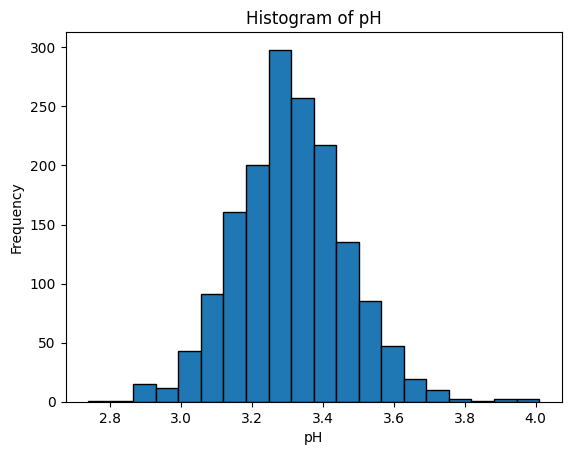

In [14]:
plt.hist(redwine_data['pH'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.title('Histogram of pH')

# Show the plot
plt.show()

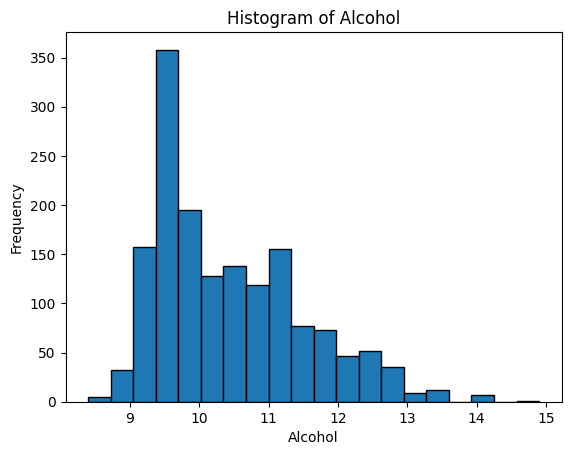

In [15]:
plt.hist(redwine_data['alcohol'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.title('Histogram of Alcohol')

# Show the plot
plt.show()

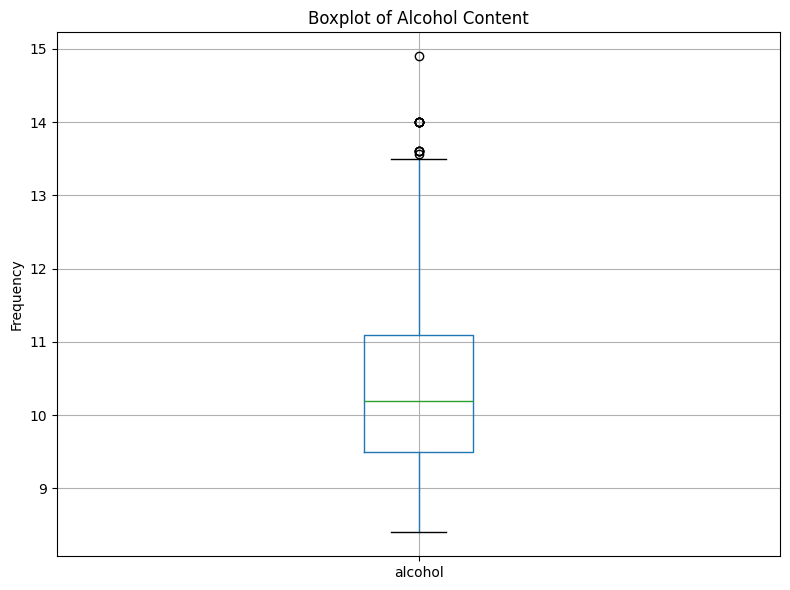

In [16]:
# Create a boxplot of alcohol content by quality category
plt.figure(figsize=(8, 6))
boxplot = redwine_data.boxplot(column=['alcohol'])

# Add title and axis labels
plt.title("Boxplot of Alcohol Content")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()



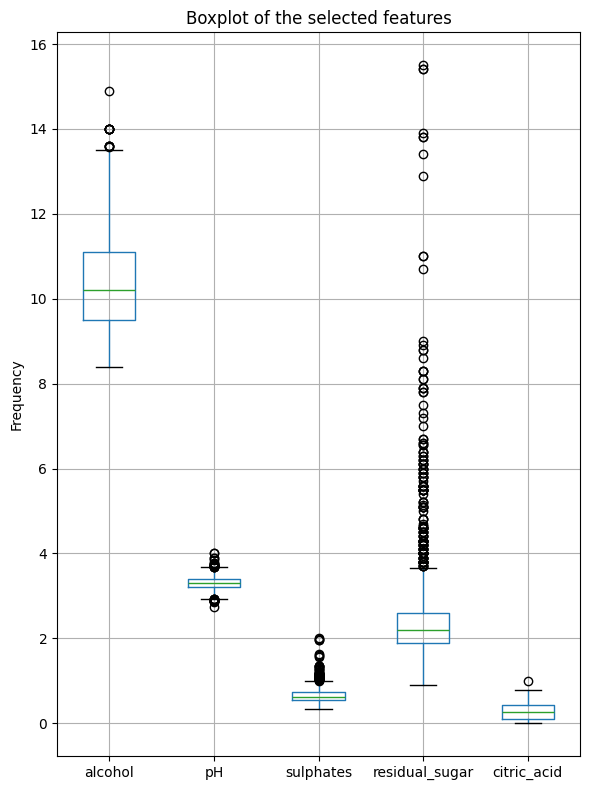

In [17]:
# Create a boxplot of alcohol content by quality category
plt.figure(figsize=(6, 8))
boxplot = redwine_data.boxplot(column=['alcohol', 'pH', 'sulphates', 'residual_sugar', 'citric_acid'])

# Add title and axis labels
plt.title("Boxplot of the selected features")
plt.ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

**Inferential Statistics**

**Formulate one hypothesis (e.g., higher alcohol content improves wine quality)**

In [18]:
# hypothesis testing for higher alcohol content improves wine quality
desc = redwine_data['quality'].describe()
desc

,quality
count,1599.000000
mean,5.636023
std,0.807569
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


In [19]:
desc = redwine_data['alcohol'].describe()
desc

,alcohol
count,1599.000000
mean,10.422983
std,1.065668
min,8.400000
25%,9.500000
50%,10.200000
75%,11.100000
max,14.900000


In [20]:
# z-test
#mu0 is mean of alcohol which is our independent variable
#mu is mean of quality which is our dependant variable
#sigma is standard deviation of alcohol
#n is the length of alcohol variable in our dataset
from statsmodels.stats.weightstats import ztest
import scipy.stats as st
x=wine_data['alcohol']
n=len(x)
mu0 = 10.46
mu = 5.6
sigma = 1.0
z = (mu -mu0) / (sigma/np.sqrt(n))
p=2*(1 - st.norm.cdf(abs(z)))
p

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Null hypothesis valid")

#null hypothesis is a way of justifying that what was assumed is true
# For this case , our null hypothesis is 0.0 and hence we reject the assumption of alcohol content improves wine quality

Reject the null hypothesis


In [21]:
#Calculate and interpret a 95% confidence interval for one numerical feature
#mu rep. mean
#sigma rep. standard deviation
#ddof value is an independent value and most cases 1
#confidence interval value is 95
import scipy.stats as st
x=wine_data['alcohol']
n=len(x)
mu, sigma = x.mean(), x.std(ddof=1)
z= st.norm.ppf(0.95)
ci = (mu - z*sigma/np.sqrt(n), mu + z*sigma/np.sqrt(n))
ci

# We are 95% confident that the mean of alcohol content for red wines lies between 10.3708% and 10.4752%.
# This means that if we were to take many random samples from the same dataset and construct a 95% confidence interval for each sample, approximately 95% of these intervals would contain the mean.

(np.float64(10.379147734070935), np.float64(10.466818494822123))

**Part 2: Correlation & Regression**

**Correlation**

**Generate a correlation heatmap**

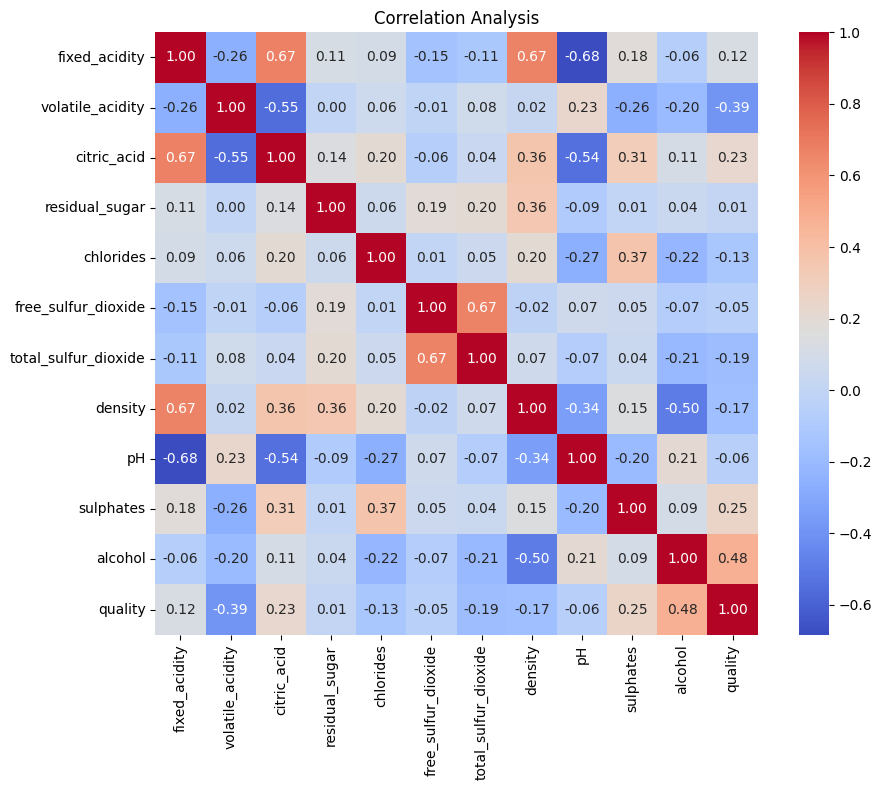

In [22]:
# Compute the correlation matrix
correlation_matrix = redwine_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f",square=True)

# Add a title and adjust layout
plt.title("Correlation Analysis")
plt.tight_layout()
plt.show()

**Strongly correlated.**
Correlation between alcohol and quality (0.48) and Correlation between fixed_acidity and density (0.67) show a positive correlation as these are close to one.
This means that an increase in one feature will increase another feature

**Weakly correlated**
Correlation between residual_sugar and sulphates (0.1) and Correlation between quality and residual_sugar (0.01) show a weak correlation as these are close to zero
This means that an increase in one feature will not increase another feature

**Regression Analysis**

**Build a simple linear regression model (1 predictor)**

In [23]:
#removing outliers
outliers = np.abs((redwine_data.drop('quality', axis=1) - redwine_data.drop('quality', axis=1).mean()) / redwine_data.drop('quality', axis=1).std())


outlier_mask = (outliers > 3).any(axis=1)
cleaned_data = redwine_data[~outlier_mask]
print("Shape of data before:", redwine_data.shape)
print("\nShape of data after:", cleaned_data.shape)
print("\nRows removed:", len(redwine_data)-len(cleaned_data))

Shape of data before: (1599, 12)

Shape of data after: (1458, 12)

Rows removed: 141


In [24]:
#building a simple linear regression
#the predictor is alcohol (X)
#target value is alcohol(Y)
from sklearn.model_selection import train_test_split
X = cleaned_data[['alcohol']]
y = cleaned_data['quality']

# Split the data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# --- Model Summary ---

# Get the intercept (b0) of the regression line
intercept = model.intercept_
# Get the coefficient (b1) for the 'alcohol' predictor
coefficient = model.coef_[0]

print(f"\nModel Equation: Quality = {coefficient:.4f} * Alcohol + {intercept:.4f}")
print(f"Intercept (b0): {intercept:.4f}")
print(f"Coefficient for Alcohol (b1): {coefficient:.4f}")

print("\nInterpretation of Results")
print(f"The positive coefficient of {coefficient:.4f} for 'alcohol' suggests that, on average, for every 1% increase in alcohol content, the wine quality increases by {coefficient:.4f} units.")




Model Equation: Quality = 0.3980 * Alcohol + 1.4904
Intercept (b0): 1.4904
Coefficient for Alcohol (b1): 0.3980

--- Interpretation of Results ---
The positive coefficient of 0.3980 for 'alcohol' suggests that, on average, for every 1% increase in alcohol content, the wine quality increases by 0.3980 units.


In [25]:
# Calculating model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # R-squared

print(f"Model Performance Metrics")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# As per result below, The low R2 value shows that this model is underfitting the data meaning its too simple and doesn't full capture
# the relationship between alcohol and quality

Model Performance Metrics
Mean Squared Error (MSE): 0.4510
Root Mean Squared Error (RMSE): 0.6715
Mean Absolute Error (MAE): 0.5127
R-squared (R2): 0.2242


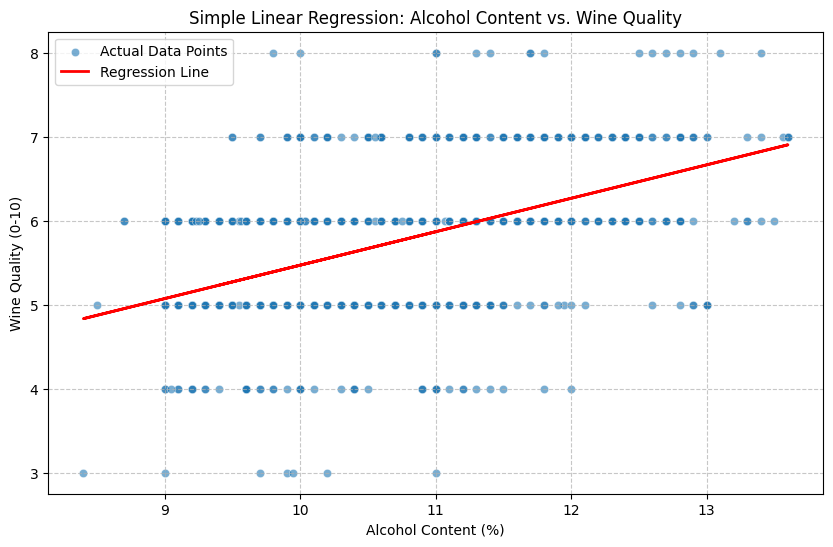

In [26]:
# --- Visualization of the Regression Line ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_data['alcohol'], y=cleaned_data['quality'], alpha=0.6, label='Actual Data Points')
plt.plot(cleaned_data['alcohol'], model.predict(cleaned_data[['alcohol']]), color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Wine Quality (0-10)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Build a multiple linear regression model (at least 3 predictors)**

In [27]:

X = cleaned_data[['alcohol', 'sulphates', 'pH']] # Predictor variables
y = cleaned_data['quality']    # Target variable (wine quality)

# Split the data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# --- Model Summary ---

# Get the intercept (b0) of the regression line
intercept = model.intercept_
# Get the coefficients for all predictors
coefficients = model.coef_

print(f"--- Multiple Linear Regression Model Summary ---")
print(f"Independent Variables (Predictors): Alcohol, Sulphates, pH")
print(f"Dependent Variable (Target): Wine Quality")
print(f"\nModel Equation: Quality = {coefficients[0]:.4f} * Alcohol + {coefficients[1]:.4f} * Sulphates + {coefficients[2]:.4f} * pH + {intercept:.4f}")
print(f"Intercept (b0): {intercept:.4f}")
print(f"Coefficients:")
print(f"  Alcohol: {coefficients[0]:.4f}")
print(f"  Sulphates: {coefficients[1]:.4f}")
print(f"  pH: {coefficients[2]:.4f}")


--- Multiple Linear Regression Model Summary ---
Independent Variables (Predictors): Alcohol, Sulphates, pH
Dependent Variable (Target): Wine Quality

Model Equation: Quality = 0.3614 * Alcohol + 1.6811 * Sulphates + -0.7773 * pH + 3.3724
Intercept (b0): 3.3724
Coefficients:
  Alcohol: 0.3614
  Sulphates: 1.6811
  pH: -0.7773


In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # R-squared

print(f"Model Performance Metrics")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Model Performance Metrics
Mean Squared Error (MSE): 0.4039
Root Mean Squared Error (RMSE): 0.6355
Mean Absolute Error (MAE): 0.4750
R-squared (R2): 0.3052


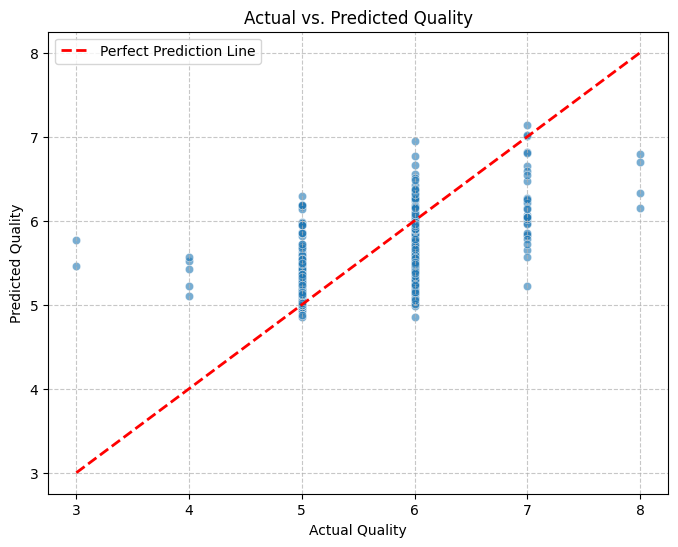

In [29]:
#visualisation of actual vs predicted quality
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs. Predicted Quality')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Part 3: ML Theory & Practice – Supervised vs Unsupervised**


**Explain (in markdown):**

**The difference between Supervised vs Unsupervised Learning**


Supervised learning

This is an approach that uses labelled data to predict outcomes for data based on relationships learned from the labelled training data. Commonly used in regression and classification tasks

Unsupervised learning

This is an approach that uses unlabelled data to discover hidden patterns within the unlabelled data. Commonly used in Clustering and Anomaly Detection

**Bias-Variance tradeoff (use diagrams if helpful)**

The Bias-Variance Tradeoff is a machine learning concept that helps us understand the relationship between a model's complexity and its ability to generalize to new, unseen data

At its core, the tradeoff states that:

As you decrease bias, you often increase variance.
As you decrease variance, you often increase bias.

**Bias** refers to the simplifying assumptions made by a model to make the target function easier to learn. It's the error introduced by approximating a real-world problem, which may be complex, by a simpler model.

**Variance** refers to the amount that the estimate of the target function will change if different training data was used. It's the model's sensitivity to small fluctuations in the training data.

The Bias-Variance Tradeoff uses the Bullseye theory to visualise the concepts. This theory uses the imagination of trying to hit a target with darts(predictions)

(Conceptual Diagram 1: Low Bias, Low Variance)
The darts are consistently hitting the bullseye or very close to it, and they are tightly clustered together.
This means the model is accurate on average (low bias) and performs consistently well across different datasets (low variance)

          +---+
          | O |  <-- Bullseye (True Relationship)
        / |   | \
       /  . .  \
      /   . .   \
     |    . .    |
     \    . .    /
      \   . .   /
       \  . .  /
        \ |   | /
          +---+

(Points are tightly clustered around the bullseye)

(Conceptual Diagram 2: High Bias, Low Variance)
The darts are consistently hitting a spot away from the bullseye, but they are tightly clustered together.
This means the model is consistently wrong (high bias), but it's consistently wrong in the same way (low variance). It's too simple and can't capture the true pattern.

          +---+
          | O |  <-- Bullseye (True Relationship)
        / |   | \
       /  . .  \
      /   . .   \
     |           |
     \   . .   /
      \  . .  /
       \ . . /
        \|   |/
          +---+

(Points are tightly clustered but consistently off-target)

(Conceptual Diagram 3: Low Bias, High Variance)
The darts are spread all over the target, but their average position is close to the bullseye.
This means the model is trying to hit the bullseye (low bias), but it's very inconsistent and sensitive to small changes (high variance). It performs well on the training data it "saw," but poorly on new data.

          +---+
          | O |  <-- Bullseye (True Relationship)
        / | . | \
       /  .   .  \
      / .     . . \
     | .       . . |
     \  .     . .  /
      \   .   .   /
       \  .   .  /
        \ | . | /
          +---+

(Points are scattered widely across the target, but their center is near the bullseye)

(Conceptual Diagram 4: High Bias, High Variance)
The darts are scattered all over the place, and their average position is far from the bullseye.
This model is both consistently wrong and inconsistent.

          +---+
          | O |  <-- Bullseye (True Relationship)
        / |   | \
       /  .     .  \
      / .         . \
     | .           . |
     \  .         .  /
      \   .     .   /
       \  .     .  /
        \ |   | /
          +---+

(Points are widely scattered and far from the bullseye)

**Model Evaluation Metrics**

**Define and compare: Accuracy, Precision, Recall, F1-score**

True Positive (TP): The model correctly predicted the positive class.

True Negative (TN): The model correctly predicted the negative class.

False Positive (FP): The model incorrectly predicted the positive class (Type I error).

False Negative (FN): The model incorrectly predicted the negative class (Type II error).

**Accuracy** is the proportion of all correct predictions (both true positives and true negatives) out of the total number of predictions made. It measures the overall correctness of the model.

Interpretation:
A high accuracy means the model is generally good at making correct predictions.
Use Case: Accuracy is a good metric when the classes in your dataset are relatively balanced.
Limitation: It can be misleading in cases of imbalanced datasets.

Precision answers the question: "Of all the instances the model predicted as positive, how many were actually positive?" It focuses on the quality of positive predictions and aims to minimize False Positives

Interpretation:
A high precision means that when the model predicts something is positive, it is very likely to be correct.

Recall (Sensitivity, True Positive Rate): Recall answers the question: "Of all the instances that were actually positive, how many did the model correctly identify as positive?" It focuses on the model's ability to find all relevant positive cases and aims to minimize False Negatives.

Interpretation:
A high recall means the model is good at finding almost all the actual positive instances

The F1-score is the harmonic mean of Precision and Recall. It provides a single metric that balances both precision and recall, especially useful for imbalanced datasets where a simple average might not be appropriate. It penalizes models that have very low values in either precision or recall

Interpretation:
A high F1-score indicates that the model has good performance with both low false positives and low false negatives.

**Part 4: Classification Models**

**Logistic Regression**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



--- Confusion Matrix ---
[[ 0  0  1  1  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0 88 28  0  0]
 [ 0  0 44 87  4  0]
 [ 0  0  3 17 10  0]
 [ 0  0  0  1  3  0]]


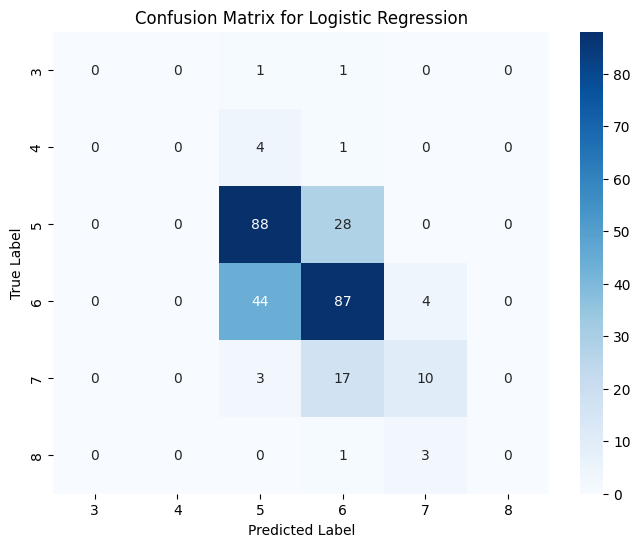


--- Classification Report ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.63      0.76      0.69       116
           6       0.64      0.64      0.64       135
           7       0.59      0.33      0.43        30
           8       0.00      0.00      0.00         4

    accuracy                           0.63       292
   macro avg       0.31      0.29      0.29       292
weighted avg       0.61      0.63      0.61       292


Overall Accuracy: 0.6336


In [30]:

# Separate features (X) and target (y)
X = cleaned_data.drop('quality', axis=1)#
y = cleaned_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# --- Evaluate the model ---

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(conf_matrix)

# Visualisation of the Confusion Matrix for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# 2. Classification Report
class_report = classification_report(y_test, y_pred, zero_division=0) # zero_division=0 to handle cases where no predictions are made for a class
print("\n--- Classification Report ---")
print(class_report)

# 3. Accuracy Score (for quick overview)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")


**Decision Tree**



--- Confusion Matrix (Decision Tree) ---
[[ 0  2  0  0  0  0]
 [ 0  1  4  0  0  0]
 [ 0  5 76 33  2  0]
 [ 1  3 32 82 17  0]
 [ 0  4  4  6 14  2]
 [ 0  0  0  0  4  0]]


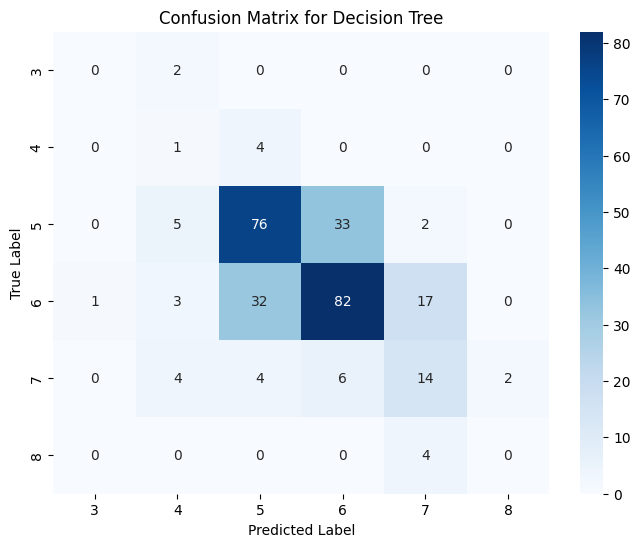


--- Classification Report (Decision Tree) ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.20      0.10         5
           5       0.66      0.66      0.66       116
           6       0.68      0.61      0.64       135
           7       0.38      0.47      0.42        30
           8       0.00      0.00      0.00         4

    accuracy                           0.59       292
   macro avg       0.30      0.32      0.30       292
weighted avg       0.61      0.59      0.60       292


Overall Accuracy (Decision Tree): 0.5925


In [31]:
# Separate features (X) and target (y)
X = cleaned_data.drop('quality', axis=1)
y = cleaned_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For Decision Trees, feature scaling is generally not required,
# but we keep the scaler for consistency if you were to compare with other models
# that do require it (like Logistic Regression or SVM).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
# Set random_state for reproducibility
dt_model = DecisionTreeClassifier(random_state=42)
# We train on the unscaled data for Decision Tree, as it's not sensitive to feature scales
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# --- Evaluate the model ---

# 1. Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\n--- Confusion Matrix (Decision Tree) ---")
print(conf_matrix_dt)

# Visualization of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# 2. Classification Report
class_report_dt = classification_report(y_test, y_pred_dt, zero_division=0)
print("\n--- Classification Report (Decision Tree) ---")
print(class_report_dt)

# 3. Accuracy Score (for quick overview)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nOverall Accuracy (Decision Tree): {accuracy_dt:.4f}")

**Random Forest**


--- Confusion Matrix (Random Forest) ---
[[ 0  1  1  0  0  0]
 [ 0  0  3  2  0  0]
 [ 0  0 92 24  0  0]
 [ 0  0 31 99  5  0]
 [ 0  0  1 15 14  0]
 [ 0  0  0  2  2  0]]


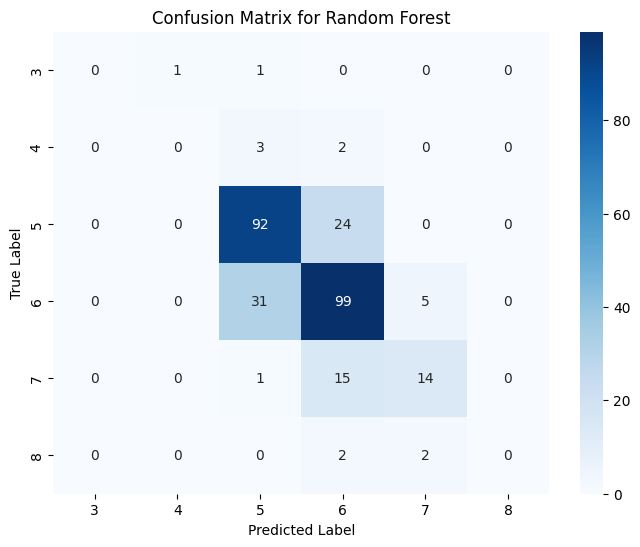


--- Classification Report (Random Forest) ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.72      0.79      0.75       116
           6       0.70      0.73      0.71       135
           7       0.67      0.47      0.55        30
           8       0.00      0.00      0.00         4

    accuracy                           0.70       292
   macro avg       0.35      0.33      0.34       292
weighted avg       0.68      0.70      0.69       292


Overall Accuracy (Random Forest): 0.7021


In [32]:
# Separate features (X) and target (y)
X = cleaned_data.drop('quality', axis=1)
y = cleaned_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For Random Forests, feature scaling is generally not required,
# but we keep the scaler for consistency if you were to compare with other models
# that do require it (like Logistic Regression or SVM).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
# Set random_state for reproducibility
# n_estimators is set to 100 as a default, could be tuned
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# We train on the unscaled data for Random Forest, as it's not sensitive to feature scales
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# --- Evaluate the model ---

# 1. Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\n--- Confusion Matrix (Random Forest) ---")
print(conf_matrix_rf)

# Visualization of Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# 2. Classification Report
class_report_rf = classification_report(y_test, y_pred_rf, zero_division=0)
print("\n--- Classification Report (Random Forest) ---")
print(class_report_rf)

# 3. Accuracy Score (for quick overview)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nOverall Accuracy (Random Forest): {accuracy_rf:.4f}")

**Support Vector Machine (SVM)**


--- Confusion Matrix (Support Vector Machine) ---
[[ 0  0  1  1  0  0]
 [ 0  0  4  1  0  0]
 [ 0  0 91 25  0  0]
 [ 0  0 39 92  4  0]
 [ 0  0  2 16 12  0]
 [ 0  0  0  2  2  0]]


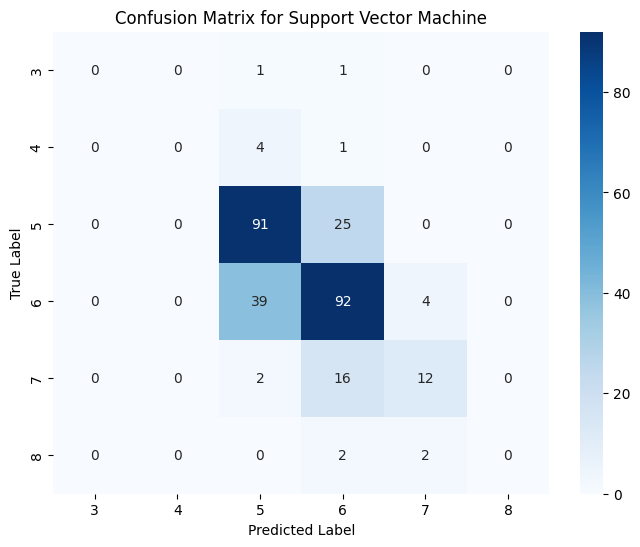


--- Classification Report (Support Vector Machine) ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.66      0.78      0.72       116
           6       0.67      0.68      0.68       135
           7       0.67      0.40      0.50        30
           8       0.00      0.00      0.00         4

    accuracy                           0.67       292
   macro avg       0.33      0.31      0.32       292
weighted avg       0.64      0.67      0.65       292


Overall Accuracy (Support Vector Machine): 0.6678


In [33]:
# Separate features (X) and target (y)
X = cleaned_data.drop('quality', axis=1)
y = cleaned_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling - ESSENTIAL for SVMs
# SVMs are highly sensitive to the scale of features, so scaling is crucial.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Support Vector Machine (SVM) model
# We'll use the Radial Basis Function (RBF) kernel, which is a common choice
# for non-linear decision boundaries. 'C' is the regularization parameter,
# and 'gamma' defines the influence of a single training example.
# These hyperparameters can be tuned for better performance.
svm_model = SVC(kernel='rbf', random_state=42, C=1.0, gamma='scale') # Using 'scale' for gamma as default
svm_model.fit(X_train_scaled, y_train) # Train on scaled data

# Make predictions on the scaled test set
y_pred_svm = svm_model.predict(X_test_scaled)

# --- Evaluate the model ---

# 1. Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\n--- Confusion Matrix (Support Vector Machine) ---")
print(conf_matrix_svm)

# Visualization of Confusion Matrix for better readability
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

# 2. Classification Report
class_report_svm = classification_report(y_test, y_pred_svm, zero_division=0)
print("\n--- Classification Report (Support Vector Machine) ---")
print(class_report_svm)

# 3. Accuracy Score (for quick overview)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"\nOverall Accuracy (Support Vector Machine): {accuracy_svm:.4f}")


**Comment on which model performed best and why**

The Random Forset model is the best as its accuracy is at 0.7021

**Part 6: Feature Engineering & Dimensionality Reduction**

**Feature Engineering**
**Handle missing values using 2+ techniques (mean, median, KNN imputer, etc.)**

In [34]:
redwine_data.isnull().sum()

,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
pH,0
sulphates,0


In [35]:
# For this dataset, there are no missing values
#If there were any, this is how I would replace with mean

redwine_data.fillna(redwine_data.mean(numeric_only=True), inplace=True)

In [36]:
#replacing with median
for col in redwine_data.columns:
    if redwine_data[col].isnull().any():
        median_val = redwine_data[col].median()
        redwine_data[col].fillna(median_val, inplace=True)

**Standard Scaler**

In [37]:
# Identify numerical columns to scale (excluding 'quality')
features_to_scale = redwine_data.columns.drop('quality')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the selected features
redwine_data[features_to_scale] = scaler.fit_transform(redwine_data[features_to_scale])

# Display the first few rows of the DataFrame with scaled features
print("DataFrame after StandardScaler scaling:")
print(redwine_data.head())

DataFrame after StandardScaler scaling:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  qua

**MinMaxScaler**

In [38]:
# Identify numerical columns to scale (excluding 'quality')
features_to_scale = redwine_data.columns.drop('quality')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the selected features
redwine_data[features_to_scale] = scaler.fit_transform(redwine_data[features_to_scale])

# Display the first few rows of the DataFrame with scaled features
print("DataFrame after MinMaxScaler scaling:")
print(redwine_data.head())

DataFrame after MinMaxScaler scaling:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quali

**SMOTE**

In [39]:
# Check the class distribution of the 'quality' column
print("Original class distribution of 'quality':")
print(redwine_data['quality'].value_counts())
print("\n")

# Separate features (X) and target (y)
X = redwine_data.drop('quality', axis=1)
y = redwine_data['quality']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("Class distribution of 'quality' after SMOTE:")
print(Counter(y_resampled))
print("\n")

Original class distribution of 'quality':
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


Class distribution of 'quality' after SMOTE:
Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})




**Apply PCA to your dataset and interpret explained variance**

In [40]:
pca = PCA(n_components=0.95)

principal_components = pca.fit_transform(redwine_data[features_to_scale])

pca_data = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.271839,-0.195125,-0.190351,0.028252,0.055550,-0.057142,-0.049759,-0.053697
1,-0.225848,-0.258617,0.017494,0.092883,-0.079645,0.188441,-0.026486,0.039340
2,-0.187260,-0.179955,-0.092509,0.041507,-0.038619,0.106815,-0.013658,0.031848
3,0.422279,-0.031881,0.038314,-0.078532,-0.115553,-0.101729,-0.030989,-0.042999
4,-0.271839,-0.195125,-0.190351,0.028252,0.055550,-0.057142,-0.049759,-0.053697
...,...,...,...,...,...,...,...,...
1594,-0.337500,-0.031716,0.161494,-0.023517,-0.019687,-0.001393,-0.055029,-0.017880
1595,-0.344092,0.038897,0.297364,0.020498,0.064034,0.008176,-0.125487,-0.043905
1596,-0.246771,0.046616,0.163354,-0.007196,0.062781,0.014809,-0.093742,0.009974
1597,-0.338070,-0.065408,0.163681,-0.031096,0.087394,-0.020384,-0.053044,-0.093343


**Apply t-SNE for 2D visualization**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


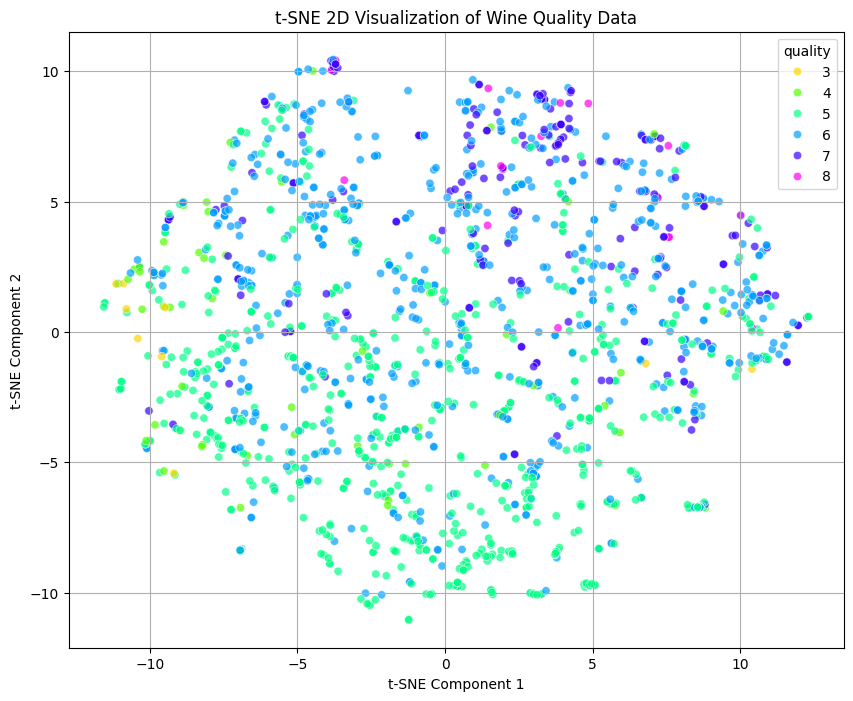

In [41]:
# Separate features (X) and target (y)
X = redwine_data.drop('quality', axis=1)
y = redwine_data['quality']

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for the t-SNE results to include the 'quality' for coloring
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['quality'] = y


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2',
    hue='quality',
    palette=sns.color_palette("hsv", len(y.unique())),
    data=tsne_df,
    legend="full",
    alpha=0.7
)
plt.title('t-SNE 2D Visualization of Wine Quality Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()

**Model Optimization**
Random Forest has been picked

In [42]:
# Separate features (X) and target (y)
X = redwine_data.drop('quality', axis=1)
y = redwine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- Starting Random Forest Hyperparameter Tuning ---")

# --- 1. GridSearchCV for Hyperparameter Tuning ---
print("\n--- GridSearchCV Results ---")

# Define the parameter grid for GridSearchCV
# These ranges are illustrative; they can be expanded or refined based on initial results
param_grid = {
    'n_estimators': [50, 100, 200], # Number of trees in the forest
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
    'max_depth': [10, 20, 30, None], # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
# n_jobs=-1 means use all available CPU cores
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Best cross-validation accuracy (GridSearchCV): {grid_search.best_score_:.4f}")

# Get the best model from GridSearchCV
best_rf_grid = grid_search.best_estimator_

# Make predictions with the best model
y_pred_grid = best_rf_grid.predict(X_test)

# Evaluate the best model from GridSearchCV on the test set
accuracy_grid = accuracy_score(y_test, y_pred_grid)
conf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
class_report_grid = classification_report(y_test, y_pred_grid, zero_division=0)

print(f"\nTest Accuracy (GridSearchCV Best Model): {accuracy_grid:.4f}")
print("\nConfusion Matrix (GridSearchCV Best Model):")
print(conf_matrix_grid)
print("\nClassification Report (GridSearchCV Best Model):")
print(class_report_grid)

# --- 2. RandomizedSearchCV for Hyperparameter Tuning ---
print("\n--- RandomizedSearchCV Results ---")

# Define the parameter distributions for RandomizedSearchCV
# Use continuous distributions for parameters where appropriate
param_distributions = {
    'n_estimators': randint(50, 250), # Random integer between 50 and 250
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(10, 50), # Random integer between 10 and 50
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize RandomizedSearchCV
# n_iter specifies the number of parameter settings that are sampled.
# cv=5 means 5-fold cross-validation
# n_jobs=-1 means use all available CPU cores
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_distributions,
                                   n_iter=50, # Number of random combinations to try
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   random_state=42,
                                   verbose=1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters found by RandomizedSearchCV: {random_search.best_params_}")
print(f"Best cross-validation accuracy (RandomizedSearchCV): {random_search.best_score_:.4f}")

# Get the best model from RandomizedSearchCV
best_rf_random = random_search.best_estimator_

# Make predictions with the best model
y_pred_random = best_rf_random.predict(X_test)

# Evaluate the best model from RandomizedSearchCV on the test set
accuracy_random = accuracy_score(y_test, y_pred_random)
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
class_report_random = classification_report(y_test, y_pred_random, zero_division=0)

print(f"\nTest Accuracy (RandomizedSearchCV Best Model): {accuracy_random:.4f}")
print("\nConfusion Matrix (RandomizedSearchCV Best Model):")
print(conf_matrix_random)
print("\nClassification Report (RandomizedSearchCV Best Model):")
print(class_report_random)

print("\n--- Comparison of Tuned Models ---")
print(f"Initial Random Forest Accuracy (from previous run): {0.6594:.4f}")
print(f"GridSearchCV Best Model Test Accuracy: {accuracy_grid:.4f}")
print(f"RandomizedSearchCV Best Model Test Accuracy: {accuracy_random:.4f}")


--- Starting Random Forest Hyperparameter Tuning ---

--- GridSearchCV Results ---
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found by GridSearchCV: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy (GridSearchCV): 0.6928

Test Accuracy (GridSearchCV Best Model): 0.6594

Confusion Matrix (GridSearchCV Best Model):
[[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 95 35  0  0]
 [ 0  0 31 95  6  0]
 [ 0  0  0 20 21  1]
 [ 0  0  0  1  4  0]]

Classification Report (GridSearchCV Best Model):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.73      0.72       130
           6       0.61      0.72      0.66       132
           7       0.68      0.50      0.58        42
           8       0.00      0.00      0.00         5